## 1.6 Уравнение гиперплоскости в задачах бинарной классификации

### Task 1

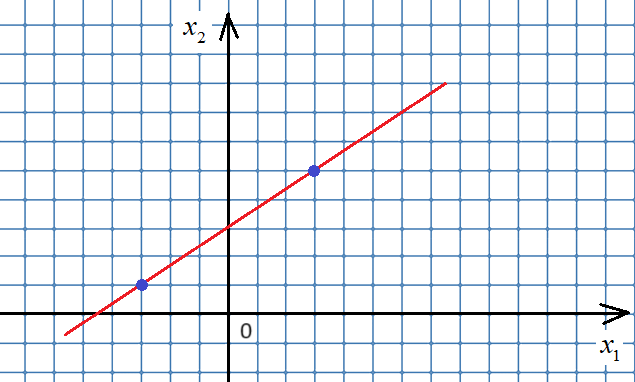

Шаг 1: Выводим формулу линии $y = b + kx$, наши точки (-3, 1), (3, 5)

1) Угловой коэффициент: $k = (y_2 - y_1) / (x_2 - x_1) = (5 - 1) / (3 - (-3)) = \frac {4}{6} = \frac {2}{3}$

2) Смещение по координатам одной точки: $y = kx + b -> b = y - kx -> b = 1 - \frac {2}{3} * (-3) = 3$

3) Уравнение: $y = 3 + \frac {2}{3}*x$

Шаг 2: Вычисляем веса

$w1​⋅x1​+w2​⋅x2​+w0​=0$ -> $y = 3 + \frac {2}{3}*x -> -3 - \frac {2}{3}*x + y = 0 | *3 -> -9 - 2*х + 3$

In [3]:
w = [-9, -2, 3]

### Task 2
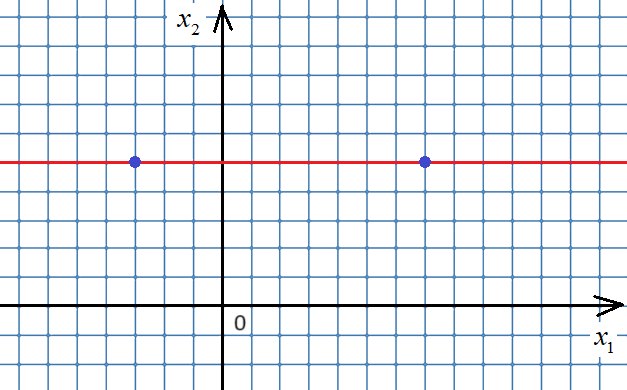

Когда линия параллельна оси Х, то угла наклона нет... коэффициент для x будет нолик, соответственно для у коэффициент будет равен единичке, а смещение -5, так как оно переедет

In [6]:
w = [-5, 0, 1]

### Task 3

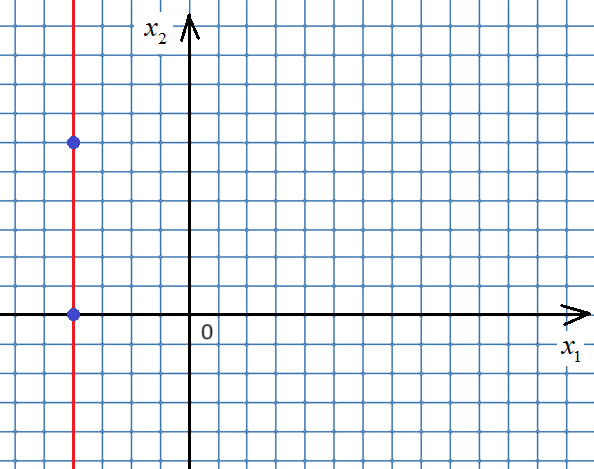

рямая вертикальная, значит у нас уравнение прямой x = -4. Переписываем как 4 + x = 0. Для нашего y будет коэффициент нолик...

In [9]:
w = [4, 1, 0]

### Task 4

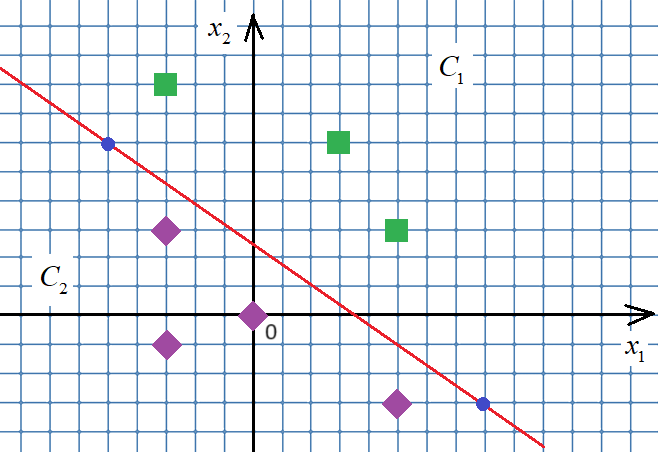

Координаты точке, которые образуют прямую линию:
$p_1 = (-5, 6), p_2=(8, -3)$

$k = (-3-6) / (8-(-5)) = -\frac {9}{13}$

$y = kx + b -> b = y - kx$. Возьмем первую точку для вычисления смещения: $b = 6 - (-\frac {9}{13} * (-5) = 6-\frac {45}{13} = \frac {(78-45)}{13} = \frac {33}{13}$

$Уравнение: y = \frac {33}{13} - \frac {9}{13}*x$

Коэффициенты: $-\frac {33}{13} + \frac {9}{13}*x + y = 0 -> -33 + 9x + 13y = 0 -> w = [-33, 9, 13]$

In [12]:
import numpy as np

x_test = [(5, -3), (-3, 8), (3, 6), (0, 0), (5, 3), (-3, -1), (-3, 3)]

# здесь продолжайте программу
x_test = [(5, -3), (-3, 8), (3, 6), (0, 0), (5, 3), (-3, -1), (-3, 3)]

w = np.array([-33, 9, 13])
a_sign = lambda x, w: -1 if x[0]*w[0] + x[1]*w[1] + x[2]*w[2] < 0 else 1
x_test_new = np.array([[1, x1, x2] for x1, x2 in x_test])
predict = [a_sign(x, w) for x in x_test_new]

predict

[-1, 1, 1, -1, 1, -1, -1]

### Task 5

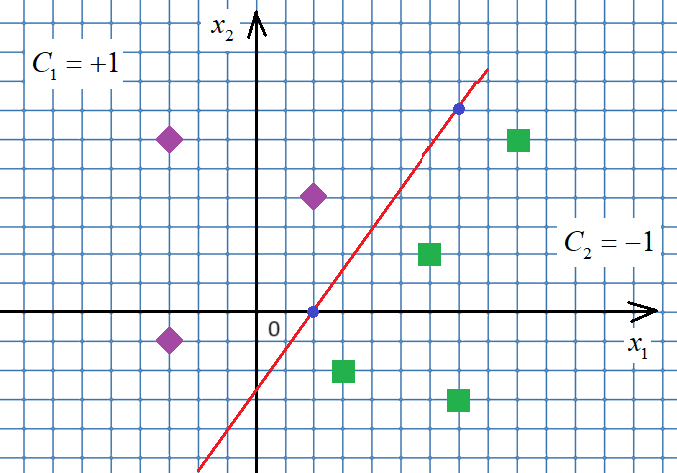

Координаты точек: $p_1 = (2, 0), p_2 = (7, 7)$

Коэффициент наклона: $k = (7-0) / (7-2) = \frac {7}{5}$

Коэффициент смещения: $b = 0 — 7/5* 2 = - \frac {14}{5}$

Уравнение линии: $y = -14/5 + \frac {7}{5} * x$

Коэффициенты: $14/5 — \frac {7}{5}*x + y = 0 -> 14 — 7*x + 5 = 0 -> [14, -7, 5]$

In [15]:
import numpy as np

x_test = [(9, 6), (2, 4), (-3, -1), (3, -2), (-3, 6), (7, -3), (6, 2)]

# здесь продолжайте программу
w = np.array([14, -7, 5])

a_sign = lambda x, w: -1 if x[0]*w[0] + x[1]*w[1] + x[2]*w[2] < 0 else 1

x_test_new = np.array([[1, x1, x2] for x1, x2 in x_test])

predict = [a_sign(x, w) for x in x_test_new]

predict

[-1, 1, 1, -1, 1, -1, -1]

# 1.7 Решение простой задачи бинарной классификации

### Task 1

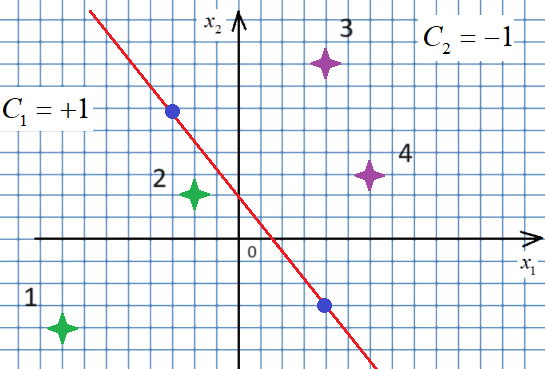

In [19]:
import numpy as np

w = np.array([15/7, -9/7, -1])
x_test = np.array([(1, -8, -4), (1, -2, 2), (1, 4, 8), (1, 6, 3)]) # задайте самостоятельно (признаки образов: x0, x1, x2)
y_test = np.array([1, 1, -1, -1]) # задайте самостоятельно (метки класса)

# здесь продолжайте программу
margin = ((x_test @ w) * y_test).tolist()

margin

[16.42857142857143, 2.7142857142857144, 11.0, 8.571428571428573]

### Task 2

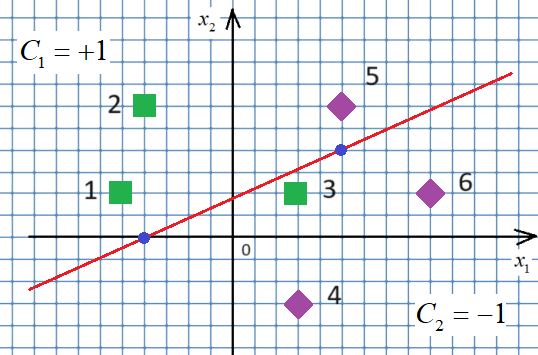

На рисунке представлена разделяющая линия в пространстве двух признаков $x_1, x_2$. Точками отмечены координаты, через которые проходит линия. Размер клеток по каждой из координат равен 1.

Зелеными квадратами изображены образы с меткой класса $C_1=+1$, а фиолетовыми ромбами - образы с меткой класса $C_2=−1$.

Вычислите вручную (аналитически) по графику вектор параметров:

$w^T=[w_0,w_1,w_2]$

которым описывается изображенная разделяющая линия в соответствии с выражением:

$w_1⋅x_1+w_2⋅x_2+w_0=0$

Итоговый вектор ww должен быть направлен от разделяющей линии в сторону образов 1 и 2 (для этих образов должно быть положительное скалярное произведение $<x,w>$).

В программе ниже вычислите значения отступов (margin) для образов 1, 2, 3, 4, 5, 6 и сохраните результат в списке margin (или кортеже) в указанном порядке (от 1 до 6). Образы расположены точно в узлах сетки (значения признаков $x_1,x_2$ - целочисленны).

P.S. На экран ничего выводить не нужно.

Точки линии:<br>
$p_1=(-4, 0)$<br>
$p_2=(5, 4)$

Угловой коэффициент:<br>
$k = \frac {y_2 - y_1}{x_2 - x_1} = \frac {4-0}{5 - (-4)} = \frac {4}{9}$

Коэффициент смещения (по точке $p_1$):<br>
$b = y - k*x = 0 - \frac {4}{9} * (-4) = \frac {16}{9}$

Уравнение:<br>
$y = \frac {16}{9} + \frac {4}{9} * x$

Коэффициенты:<br>
$- \frac {16}{9} - \frac {4}{9} * x + y = 0 | *9$<br>
$ -16 - 4*x + 9 = 0$


In [23]:
import numpy as np

w = np.array([-16, -4, 9]) # задайте самостоятельно (параметры модели: w0, w1, w2 - ориентация разделяющей линии)
x_test = np.array(
    [[1, -5, 2], # 1
    [1, -4, 6], # 2
    [1, 3, 2],  # 3
    [1, 3, -3], # 4
    [1, 5, 6],  # 5
    [1, 9, 2],]  # 6
) # задайте самостоятельно (признаки образов: x0, x1, x2)

y_test = np.array([1, 1, 1, -1, -1, -1]) # задайте самостоятельно (метки класса)

# здесь продолжайте программу

In [25]:
margin = ((x_test @ w) * y_test).tolist()
margin

[22, 54, -10, 55, -18, 34]

### Task 3

Продолжите программу, в которой задана тестовая выборка в виде набора образов с двумя признаками x1,x2x1​,x2​ и соответствующими метками двух классов. Также в программе определен вектор параметров ww модели a(x)a(x), задающие ориентацию разделяющей линии. 

Необходимо вычислить показатель качества Q в соответствии с формулой:

$Q=∑_{i}[M_i<0]$

где Mi=yi⋅<w,xi>Mi​=yi​⋅<w,xi​> - отступ для i-го образа; [] - скобки нотации Айверсона.

Выведите полученное значение Q на экран.

In [28]:
import numpy as np

x_test = np.array([(-5, 2), (-4, 6), (3, 2), (3, -3), (5, 5), (5, 2), (-1, 3)])
y_test = np.array([1, 1, 1, -1, -1, -1, -1])
w = np.array([-8/3, -2/3, 1])

# здесь продолжайте программу
x_test = np.array([[1, x1, x2] for x1, x2 in x_test])
margin = (x_test @ w) * y_test
Q = sum(m < 0 for m in margin)
print(Q)

2


# 1.8 Функции потерь в задачах линейной бинарной классификации

$Q(\omega) = \sum_{i=1}^{l} (1 - \omega^T \cdot x_i \cdot y_i)^2-> \underset{\omega}{\min}$

Берем производную функции по $\omega$<br><br>
$\frac {dQ(\omega)}{d\omega} = (\sum_{i=1}^{l} (1 - \omega^T \cdot x_i \cdot y_i)^2)'$<br><br>

Функция сложная, правило: $(u(v(x)))^{\prime}=u^{\prime}(v) \cdot v^{\prime}(x)$<br>
Степерь двоечки слезла, внутри у единички нет $\omega$, она зануляется, от части выражения с омегой останется $(- x_i^T \cdot y_i)$<br><br>
$\frac {dQ(\omega)}{d\omega} = 2 \cdot \sum_{i=1}^{l} (1 - \omega^T \cdot x_i \cdot y_i) \cdot (- x_i^T \cdot y_i)$<br><br>

Минус поставим перед двоечкой:<br><br>
$\frac {dQ(\omega)}{d\omega} = - 2 \cdot \sum_{i=1}^{l} (1 - \omega^T \cdot x_i \cdot y_i) \cdot x_i^T \cdot y_i$<br><br>

Так как мы минимизируем, приравняем к нулю:<br><br>
$- 2 \cdot \sum_{i=1}^{l} (1 - \omega^T \cdot x_i \cdot y_i) \cdot x_i^T \cdot y_i = 0$<br><br>

Разделим обе части уравнения на -2:<br><br>
$\sum_{i=1}^{l} (1 - \omega^T \cdot x_i \cdot y_i) \cdot x_i^T \cdot y_i = 0$

Разведем операцию вычитания с сумматоре:<br><br>
$(\sum_{i=1}^{l} (1)  - \sum_{i=1}^{l}\omega^T \cdot x_i \cdot y_i)) \cdot x_i^T \cdot y_i = 0$

Раскроем скобки, $\omega$ вылезет из-под сумматора, это число; $x_i^T \cdot y_i$ залезет внутрь второго сумматора:<br><br>
$\sum_{i=1}^{l} (1) \cdot x_i^T \cdot y_i - \omega^T \cdot\sum_{i=1}^{l}( x_i \cdot x_i^T \cdot y_i^2) = 0$<br><br>

Перекинем вычитаемое вправо:<br><br>
$\sum_{i=1}^{l} \cdot x_i^T \cdot y_i = \omega^T \cdot\sum_{i=1}^{l}( x_i \cdot x_i^T \cdot y_i^2)$<br><br>

Умножаем на обратную матрицу, чтобы наша $\omega$ начала солировать:<br><br>
$\sum_{i=1}^{l} \cdot x_i^T \cdot y_i \cdot(\sum_{i=1}^{l}( x_i \cdot x_i^T \cdot y_i^2))^-1 = \omega^T \cdot\sum_{i=1}^{l}( x_i \cdot x_i^T \cdot y_i^2)\cdot(\sum_{i=1}^{l}( x_i \cdot x_i^T \cdot y_i^2))^-1$<br><br>

$\omega^T = \sum_{i=1}^{l} \cdot x_i^T \cdot y_i \cdot(\sum_{i=1}^{l}( x_i \cdot x_i^T \cdot y_i^2))^-1$

### Task 1

В программе ниже объявлена функция func, возвращающая значения функции:

$f(x)=0.1⋅x2−sin(x)+0.1⋅cos(5x)+1$

Также определен вектор отсчетов coord_x по оси абсцисс (Ox) в диапазоне $[-5; 5]$ с шагом 0,1 и вектор coord_y значений функции f(x) по оси ординат в соответствующих отсчетах coord_x.

```python
import numpy as np


def func(x):
    return 0.1 * x**2 - np.sin(x) + 0.1 * np.cos(x * 5) + 1.


coord_x = np.arange(-5.0, 5.0, 0.1) # значения отсчетов по оси абсцисс
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x) # общее число отсчетов
```

Вам необходимо продолжить эту программу и вычислить значение показателя качества QQ (среднего эмпирического риска):

$Q(a,X)=\frac{1}{n} \cdot ∑_i L_i(w,x_i)$

для модели:

$a(x,w)=w0+w1⋅x+w2⋅x2+w3⋅x3+w4⋅x4$

с параметрами (в порядке: $w0,w1,w2,w3,w4​$):

$w^T=[1.11,−0.26,0.061,0.0226,0.00178]^T$

и квадратической функцией потерь:

$Li(w,xi)=(a(xi,w)−f(xi))2$

Вычисленное значение показателя качества Q следует сохранить в переменной Q.

P.S. На экран ничего выводить не нужно.

In [32]:
import numpy as np


def func(x):
    return 0.1 * x**2 - np.sin(x) + 0.1 * np.cos(x * 5) + 1.


# здесь объявляйте дополнительные функции (если необходимо)
poly_model = lambda x, w: w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3 + w[4]*x**4

coord_x = np.arange(-5.0, 5.0, 0.1) # значения отсчетов по оси абсцисс
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x) # общее число отсчетов

# здесь продолжайте программу
w = np.array([1.11, -0.26, 0.061, 0.0226, 0.00178])

model_values = poly_model(coord_x, w)
loss = (model_values - coord_y)**2
Q = np.mean(loss)
Q

0.17749243683224195

<Axes: >

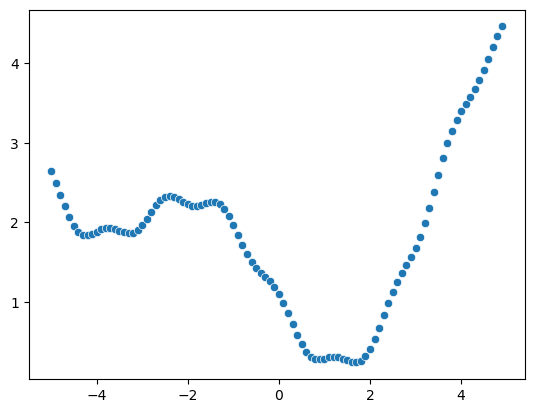

In [34]:
import seaborn as sns


sns.scatterplot(x=coord_x, y=coord_y)

In [36]:
coord_x = np.arange(-5.0, 5.0, 0.1).reshape(-1, 1) # значения отсчетов по оси абсцисс
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x) # общее число отсчетов

w = np.array([1.11, -0.26, 0.061, 0.0226, 0.00178]).reshape(-1, 1)
X = np.power(coord_x, np.arange(5))

Q = np.square(X @ w - coord_y).mean()
Q

0.17749243683224197

### Task 2


В программе ниже объявлена функция func, возвращающая значения функции:

$f(x) = 0.5 \cdot x^2 - \frac {0.1}{e^-x} + 0.5 \cdot cos(2x) - 2$

Также определен вектор отсчетов coord_x по оси абсцисс (Ox) в диапазоне $[-5; 5]$ с шагом 0.1 и вектор coord_y значений функции f(x) по оси ординат в соответствующих отсчетах coord_x.

```python
import numpy as np


def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.


coord_x = np.arange(-5.0, 5.0, 0.1) # значения отсчетов по оси абсцисс
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x) # общее число отсчетов
```

Вам необходимо продолжить эту программу и вычислить значение показателя качества Q (среднего эмпирического риска):

$Q(a,X)= \frac {1}{n}∑_i L_i(\omega, x_i)$

для модели:

$a(x, \omega)=w_0+w_1⋅x+w_2⋅x^2+w_3⋅cos(2x)+w_4⋅sin(2x)$

с параметрами (в порядке: $w0,w1,w2,w3,w4$​):

$w=[−1.59,−0.69,0.278,0.497,−0.106]^T$

и абсолютной функцией потерь:

$L_i(\omega,x_i)=∣a(x_i,\omega)−f(x_i)$

Вычисленное значение показателя качества Q следует сохранить в переменной Q.

P.S. На экран ничего выводить не нужно.

In [39]:
import numpy as np


def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.


# здесь объявляйте дополнительные функции (если необходимо)
complex_func = lambda x, w: w[0] + w[1]*x + w[2]*x**2 + w[3]*np.cos(2*x) + w[4]*np.sin(2*x)

coord_x = np.arange(-5.0, 5.0, 0.1) # значения отсчетов по оси абсцисс
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x) # общее число отсчетов

# здесь продолжайте программу
w = [-1.59, -0.69, 0.278, 0.497, -0.106]
model_values = complex_func(coord_x, w)
loss = np.abs(model_values - coord_y)
Q = np.mean(loss)
Q

0.9250026294525024

### Task 3

В программе дана следующая обучающая выборка для задачи бинарной классификации:

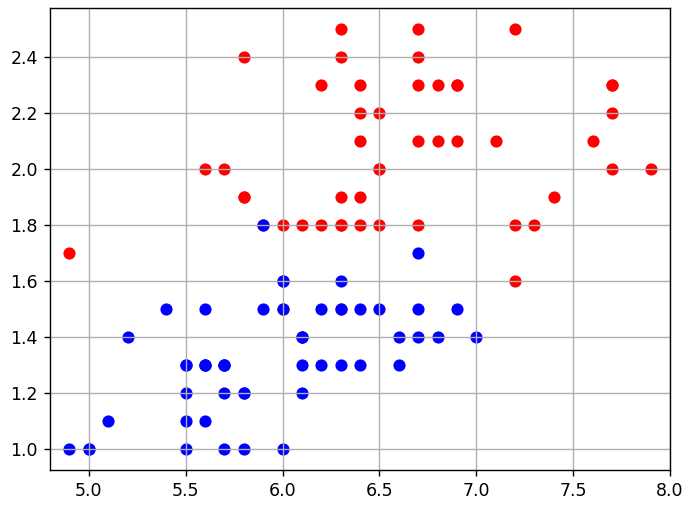

Вам необходимо продолжить программу для вычисления вектора параметров:

$w=[w0,w1,w2]^T$

которым описывается разделяющая линия в соответствии с выражением:

$w_1⋅x_1+w_2⋅x_2+w_0=0$

В качестве функции потерь следует выбрать квадратическую функцию:

$Li(w)=(1−M_i)^2=(1−w^T⋅x_i⋅y_i)^2$

Тогда точку минимума функционала качества (n - размер выборки):

$Q(w)=∑_i (1−w^T \cdot x_i \cdot y_i)^2$

можно найти по формуле:

$w^T=∑_i(x_i^T⋅y_i)⋅(∑_i x_i⋅x_i^T)^−1$

Вычисления по этой формуле следует сделать с помощью программы на языке Python с использованием пакета NumPy. Результат вычислений сохраните в списке или кортеже w.

P.S. На экран ничего выводить не нужно.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.array([(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)])
data_y = np.array([-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1])

In [44]:
# data_x = np.array([[1] + [*x] for x in data_x])
# pt = np.sum([x * y for x, y in zip(data_x, data_y)], axis=0)
# xxt = np.sum([np.outer(x, x) for x in data_x], axis=0)
# w = np.dot(pt, np.linalg.inv(xxt)).tolist()
# w

In [46]:
X = np.hstack((np.ones((len(data_x), 1)), data_x))
y = np.array(data_y).reshape(-1, 1)

w = (np.linalg.inv(X.T @ X) @ X.T @ y).reshape(-1)
w

array([-3.31307062,  0.00617453,  1.95370269])

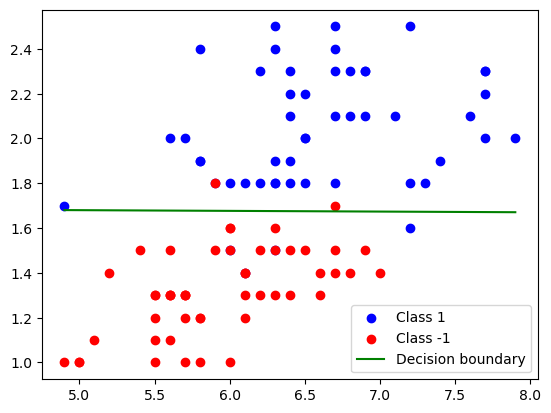

In [48]:
class_1 = data_x[data_y == 1]
class_minus_1 = data_x[data_y == -1]

x_min, x_max = np.min(data_x[:, 0]), np.max(data_x[:, 0])
x_range = np.linspace(x_min, x_max, 100)
y_range = - (w[0] + w[1] * x_range) / w[2]

plt.figure()
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
plt.scatter(class_minus_1[:, 0], class_minus_1[:, 1], color='red', label='Class -1')
plt.plot(x_range, y_range, color='green', label='Decision boundary')
plt.legend()
plt.show()